In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
from google.colab import files
uploaded = files.upload()

Saving benchmark_summary_across_qubo (8) (1).csv to benchmark_summary_across_qubo (8) (1) (1).csv
Saving benchmark_summary_across_greedy (8) (1).csv to benchmark_summary_across_greedy (8) (1) (1).csv
Saving single_run_summary_greedy (1) (1).csv to single_run_summary_greedy (1) (1) (1).csv
Saving synthetic_summary_across_qubo.csv to synthetic_summary_across_qubo (1).csv


In [7]:
synthetic_qubo = pd.read_csv("synthetic_summary_across_qubo.csv")
synthetic_greedy = pd.read_csv("single_run_summary_greedy (1) (1).csv")
benchmark_qubo = pd.read_csv("benchmark_summary_across_qubo (8) (1).csv")
benchmark_greedy = pd.read_csv("benchmark_summary_across_greedy (8) (1).csv")

synthetic_qubo["method"] = "Synthetic QUBO"
synthetic_greedy["method"] = "Synthetic Greedy"
benchmark_qubo["method"] = "Benchmark QUBO"
benchmark_greedy["method"] = "Benchmark Greedy"

combined = pd.concat([
    synthetic_qubo,
    synthetic_greedy,
    benchmark_qubo,
    benchmark_greedy
], ignore_index=True)


In [8]:
metrics = [
    "final_trust",
    "trusturgency",
    "avg_spoofed",
    "avg_coord_success",
    "avg_solve_time"
]

label_map = {
    "final_trust": "Final Trust",
    "trusturgency": "Trust-Urgency Score",
    "avg_spoofed": "Avg Spoofed Rate",
    "avg_coord_success": "Coordination Success",
    "avg_solve_time": "Avg Solve Time (s)"
}

/tmp/ipython-input-11-1649539594.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined, x="method", y=metric, palette="viridis", errorbar="sd")


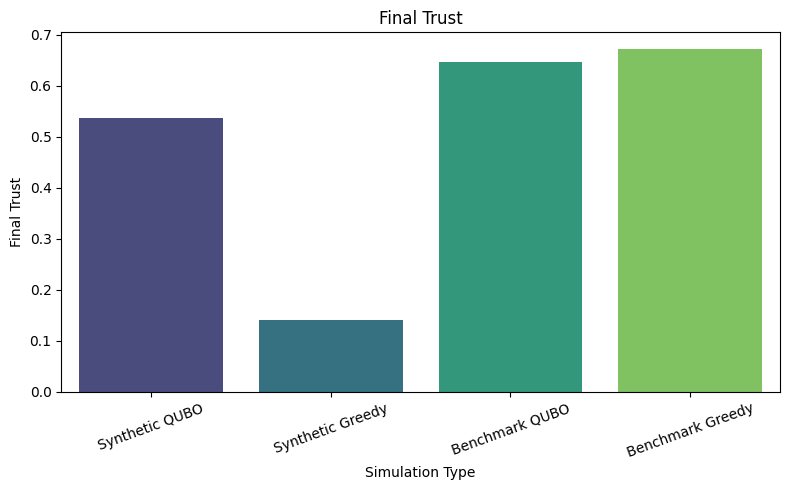

/tmp/ipython-input-11-1649539594.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined, x="method", y=metric, palette="viridis", errorbar="sd")


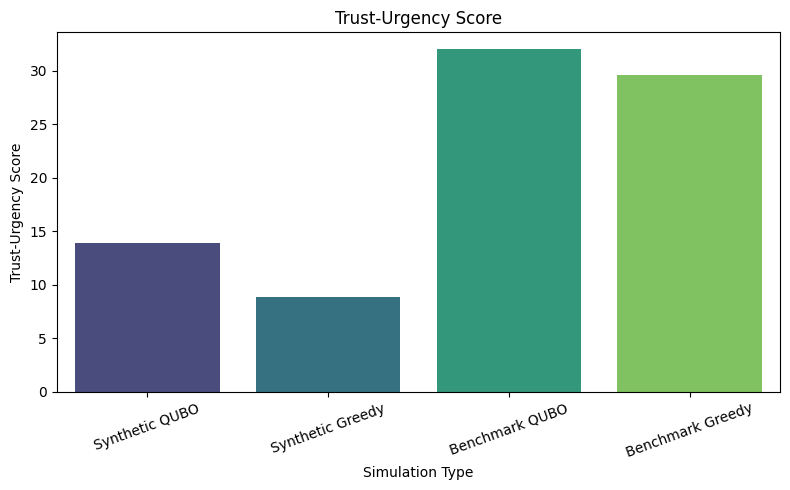

/tmp/ipython-input-11-1649539594.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined, x="method", y=metric, palette="viridis", errorbar="sd")


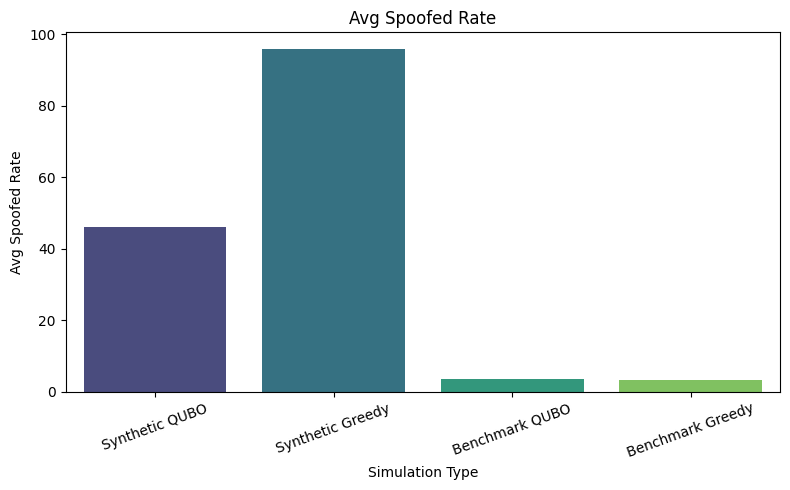

/tmp/ipython-input-11-1649539594.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined, x="method", y=metric, palette="viridis", errorbar="sd")


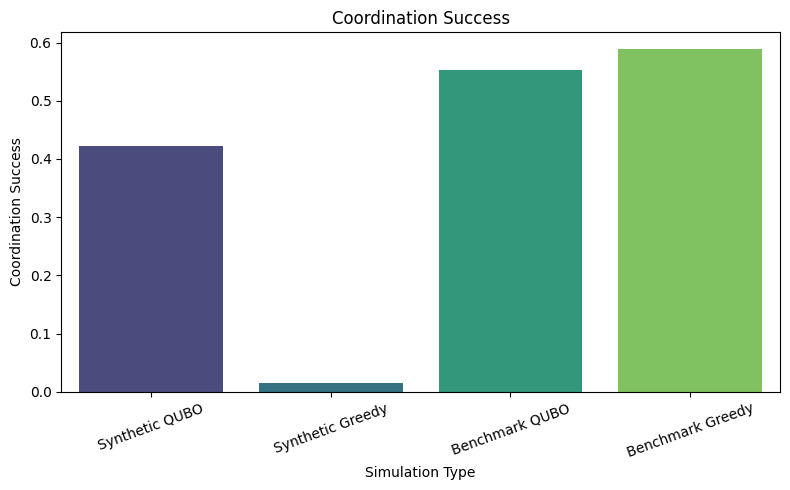

/tmp/ipython-input-11-1649539594.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined, x="method", y=metric, palette="viridis", errorbar="sd")


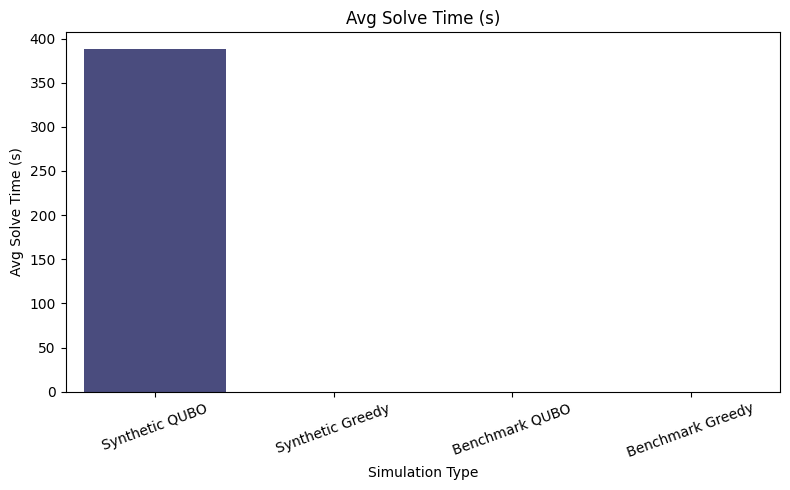

In [11]:
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=combined, x="method", y=metric, palette="viridis", errorbar="sd")
    plt.title(f"{label_map[metric]}")
    plt.ylabel(label_map[metric])
    plt.xlabel("Simulation Type")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()


In [14]:
combined = combined.drop(columns=["avg_qubo_score"], errors="ignore")

summary_stats = combined.groupby("method").agg(["mean", "std"]).round(2)
display(summary_stats)

label_map = {
    "final_trust": "Final Trust",
    "trusturgency": "Trust × Urgency",
    "avg_spoofed": "Avg. Spoofed",
    "avg_recovery": "Avg. Recovery",
    "avg_coord_success": "Coord. Success Rate",
    "avg_violations": "Precedence Violations",
    "avg_duplicates": "Task Duplicates",
    "avg_distance": "Avg. Distance",
    "avg_solve_time": "Solve Time (s)"
}



final_trust     trusturgency     avg_spoofed      \
                        mean std         mean std        mean std   
method                                                              
Benchmark Greedy        0.67 NaN        29.61 NaN        3.26 NaN   
Benchmark QUBO          0.65 NaN        32.01 NaN        3.65 NaN   
Synthetic Greedy        0.14 NaN         8.87 NaN       95.71 NaN   
Synthetic QUBO          0.54 NaN        13.87 NaN       46.07 NaN   

                 avg_recovery     avg_coord_success      ... avg_duplicates  \
                         mean std              mean std  ...           mean   
method                                                   ...                  
Benchmark Greedy          0.0 NaN              0.59 NaN  ...           2.59   
Benchmark QUBO            0.0 NaN              0.55 NaN  ...           0.00   
Synthetic Greedy          0.0 NaN              0.01 NaN  ...           4.48   
Synthetic QUBO            0.0 NaN              0.42 NaN  ...           0.00   

                     avg_distance     avg_solve_time     avg_bait      \
                 std         mean std           mean std     mean std   
method                                                                  
Benchmark Greedy NaN        13.29 NaN           0.00 NaN      NaN NaN   
Benchmark QUBO   NaN        28.20 NaN           0.18 NaN      NaN NaN   
Synthetic Greedy NaN         4.73 NaN           0.06 NaN     0.00 NaN   
Synthetic QUBO   NaN        83.91 NaN         387.67 NaN     0.06 NaN   

                 qubo_score      
                       mean std  
method                           
Benchmark Greedy        NaN NaN  
Benchmark QUBO          NaN NaN  
Synthetic Greedy        NaN NaN  
Synthetic QUBO        14.79 NaN  

[4 rows x 22 columns]